In [1]:
folder = 'Gel'

In [2]:
#import sys
#!{sys.executable} -m pip install sklearn

In [3]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture


In [80]:
import pandas as pd

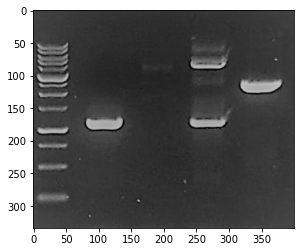

In [514]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread(folder+'\\6.png') 
  
# Output Images 
plt.imshow(img) 

In [515]:
pixels = img.reshape( img.shape[0]*img.shape[1], img.shape[2] )

### REMEMBER 1 is WHITE!!!!

# 1. Process the image in the correct data set

In [516]:
x=np.array(range(img.shape[1]))

In [517]:
y=np.array(range(img.shape[0]))

In [518]:
x1=np.repeat(x,img.shape[0], axis=0)
x2=x1.reshape(img.shape[1],img.shape[0])
x=x2.transpose()


In [519]:
y1=np.repeat(y,img.shape[1], axis=0)

In [520]:
# y1 is already in the correct shape but x needs to be created from x

In [521]:
y_flat=y1
x_flat=x.flatten()

In [522]:
X=x_flat

In [523]:
X=np.c_[ X, y_flat ]          

In [524]:
X=np.c_[X,pixels]

In [525]:
pixels_flat=pixels.flatten()

In [526]:
X[:,0]

array([  0.,   1.,   2., ..., 397., 398., 399.])

In [492]:
#This is really not necessary for B&W because r==g==b
min_pixel=min(pixels_flat)
new_pixels=[]
for p in pixels:
    new_pixels.append(100*np.sqrt((p[0]-min_pixel)**2+(p[1]-min_pixel)**2+(p[2]-min_pixel)**2))
# If used, replace X creation
#X=x_flat
#X=np.c_[ X, y_flat ]  
#X=np.c_[X,new_pixels]

## 1.2. Select only White cells, since we only need to classify them

In [557]:
# Black/White divider - technically any of [0.1...0.9] will do since we only have 1 and 0
divider=70

In [558]:
min(X[:, 2]),max(X[:, 2]),np.mean(X[:, 2])

(0.003921568859368563, 0.7450980544090271, 0.22866793353203266)

In [559]:
min(X[:, 2]),max(X[:, 2]),np.mean(X[:, 2])
divider_r=(max(X[:, 2])-min(X[:, 2]))*divider/100

In [560]:
# for B&W, these are not G and B are actually useless as they are equal to R
min(X[:, 3]),max(X[:, 3]),np.mean(X[:, 3])
divider_g=(max(X[:, 3])-min(X[:, 3]))*divider/100

In [561]:
min(X[:, 4]),max(X[:, 4]),np.mean(X[:, 4])
divider_b=(max(X[:, 4])-min(X[:, 4]))*divider/100

In [562]:
divider_r,divider_g,divider_b

(0.5188235398847609, 0.5188235398847609, 0.5188235398847609)

In [563]:
len(X[X[:, 2] <divider_r]),len(X)

(129772, 133600)

In [564]:
X1 = X[X[:, 2] >divider_r]

In [565]:
len(X1)

3828

# 2. Dirichlet Gaussian

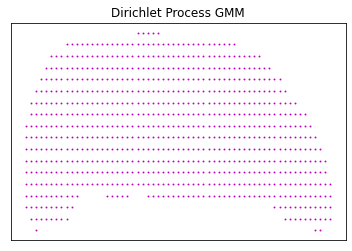

<Figure size 1440x720 with 0 Axes>

In [591]:

# https://scikit-learn.org/0.16/modules/generated/sklearn.mixture.GMM.html#sklearn.mixture.GMM.fit
# Fit a mixture of Gaussians with EM using five components
#gmm = mixture.GaussianMixture (n_components=5, covariance_type='full')
#gmm.fit(X)
# Fit a Dirichlet process mixture of Gaussians using 20 components for image 5
# Fit a Dirichlet process mixture of Gaussians using 20 components for image 6
dpgmm = mixture.BayesianGaussianMixture(n_components=9, covariance_type='diag')
dpgmm.max_iter=1000
dpgmm.fit(X1)
color_iter = itertools.cycle(['m',"g","r","c","b","k"])
for i, (clf, title) in enumerate([#(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    
    splot = plt.subplot(1, 1, 1 + i)
    Y_ = clf.predict(X1)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf.covariances_, color_iter)):
        
        
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X1[Y_ == i, 0], X1[Y_ == i, 1], .8, color=color)
        break

    plt.xticks(())
    plt.yticks(())
    plt.title(title)
plt.figure(figsize=(20,10))    
plt.show()




### 2.1. For finding the error manually

In [115]:
compareY_Y=X[:,2]
compareY_Y=np.c_[ compareY_Y, Y_ ] 

In [116]:
df=pd.DataFrame(compareY_Y)

In [117]:
df.to_csv('compareY_Y.csv')

## KMeans

In [170]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [478]:
color=['m',"g","r","c","b","k"]
c=[]
for i in labels:
    c.append(color[int(i)])

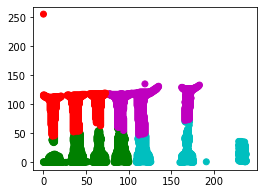

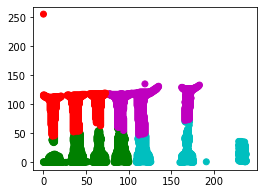

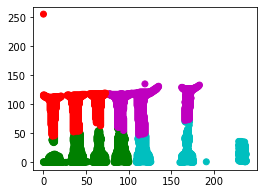

<Figure size 288x216 with 0 Axes>

In [480]:
from mpl_toolkits.mplot3d import Axes3D
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=5)),
              ('k_means_iris_bad_init', KMeans(n_clusters=4, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    est.fit(X1)
    labels = est.labels_

    plt.scatter(X1[:, 0], X1[:, 1],color=c)


    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))



# Annexure: print images to see what  might be wrong

In [555]:
X[:,2]

array([0.24705882, 0.24705882, 0.25098041, ..., 0.26666668, 0.25882354,
       0.26666668])

In [553]:
color=['m',"g","r","c","b","k"]
c=[]
for i in X[:,2]:
    c.append(color[int(i)])

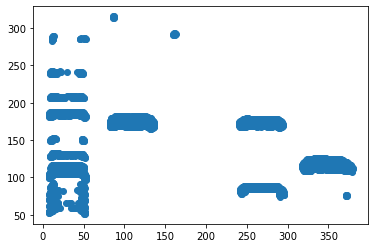

In [566]:
plt.scatter(X1[:, 0], X1[:, 1])

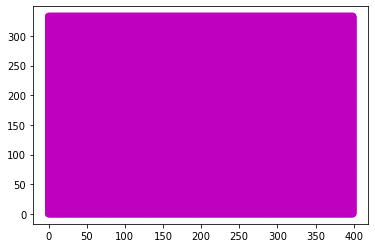

In [567]:
plt.scatter(X[:, 0], X[:, 1],color=c)